# ADCP Data for Quicche Report

In [2]:
import pandas as pd
import numpy as np
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import cmocean as cm
import cmocean.cm as cmo
import cartopy.feature as cfeature
from mpl_toolkits.mplot3d import axes3d
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.dates as mdates

font = {'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)


In [3]:
def rot_ticks(axs,rot,ha):
    for xlabels in axs.get_xticklabels():
                xlabels.set_rotation(rot)
                xlabels.set_ha(ha)

In [4]:
ds = xr.open_dataset("os150nb.nc")

<xarray.DataArray 'time' (time: 11527)>
array([False, False, False, ..., False, False, False])
Coordinates:
  * time     (time) datetime64[ns] 2023-03-04T14:46:08 ... 2023-03-29T09:23:00

In [5]:
#can only run this once
ds['depth'] = ds['depth'].isel(time=0)
ds = ds.swap_dims({"depth_cell":"depth"})

Text(0.5, 0.98, 'ADCP Data for QUICCHE Cruise')

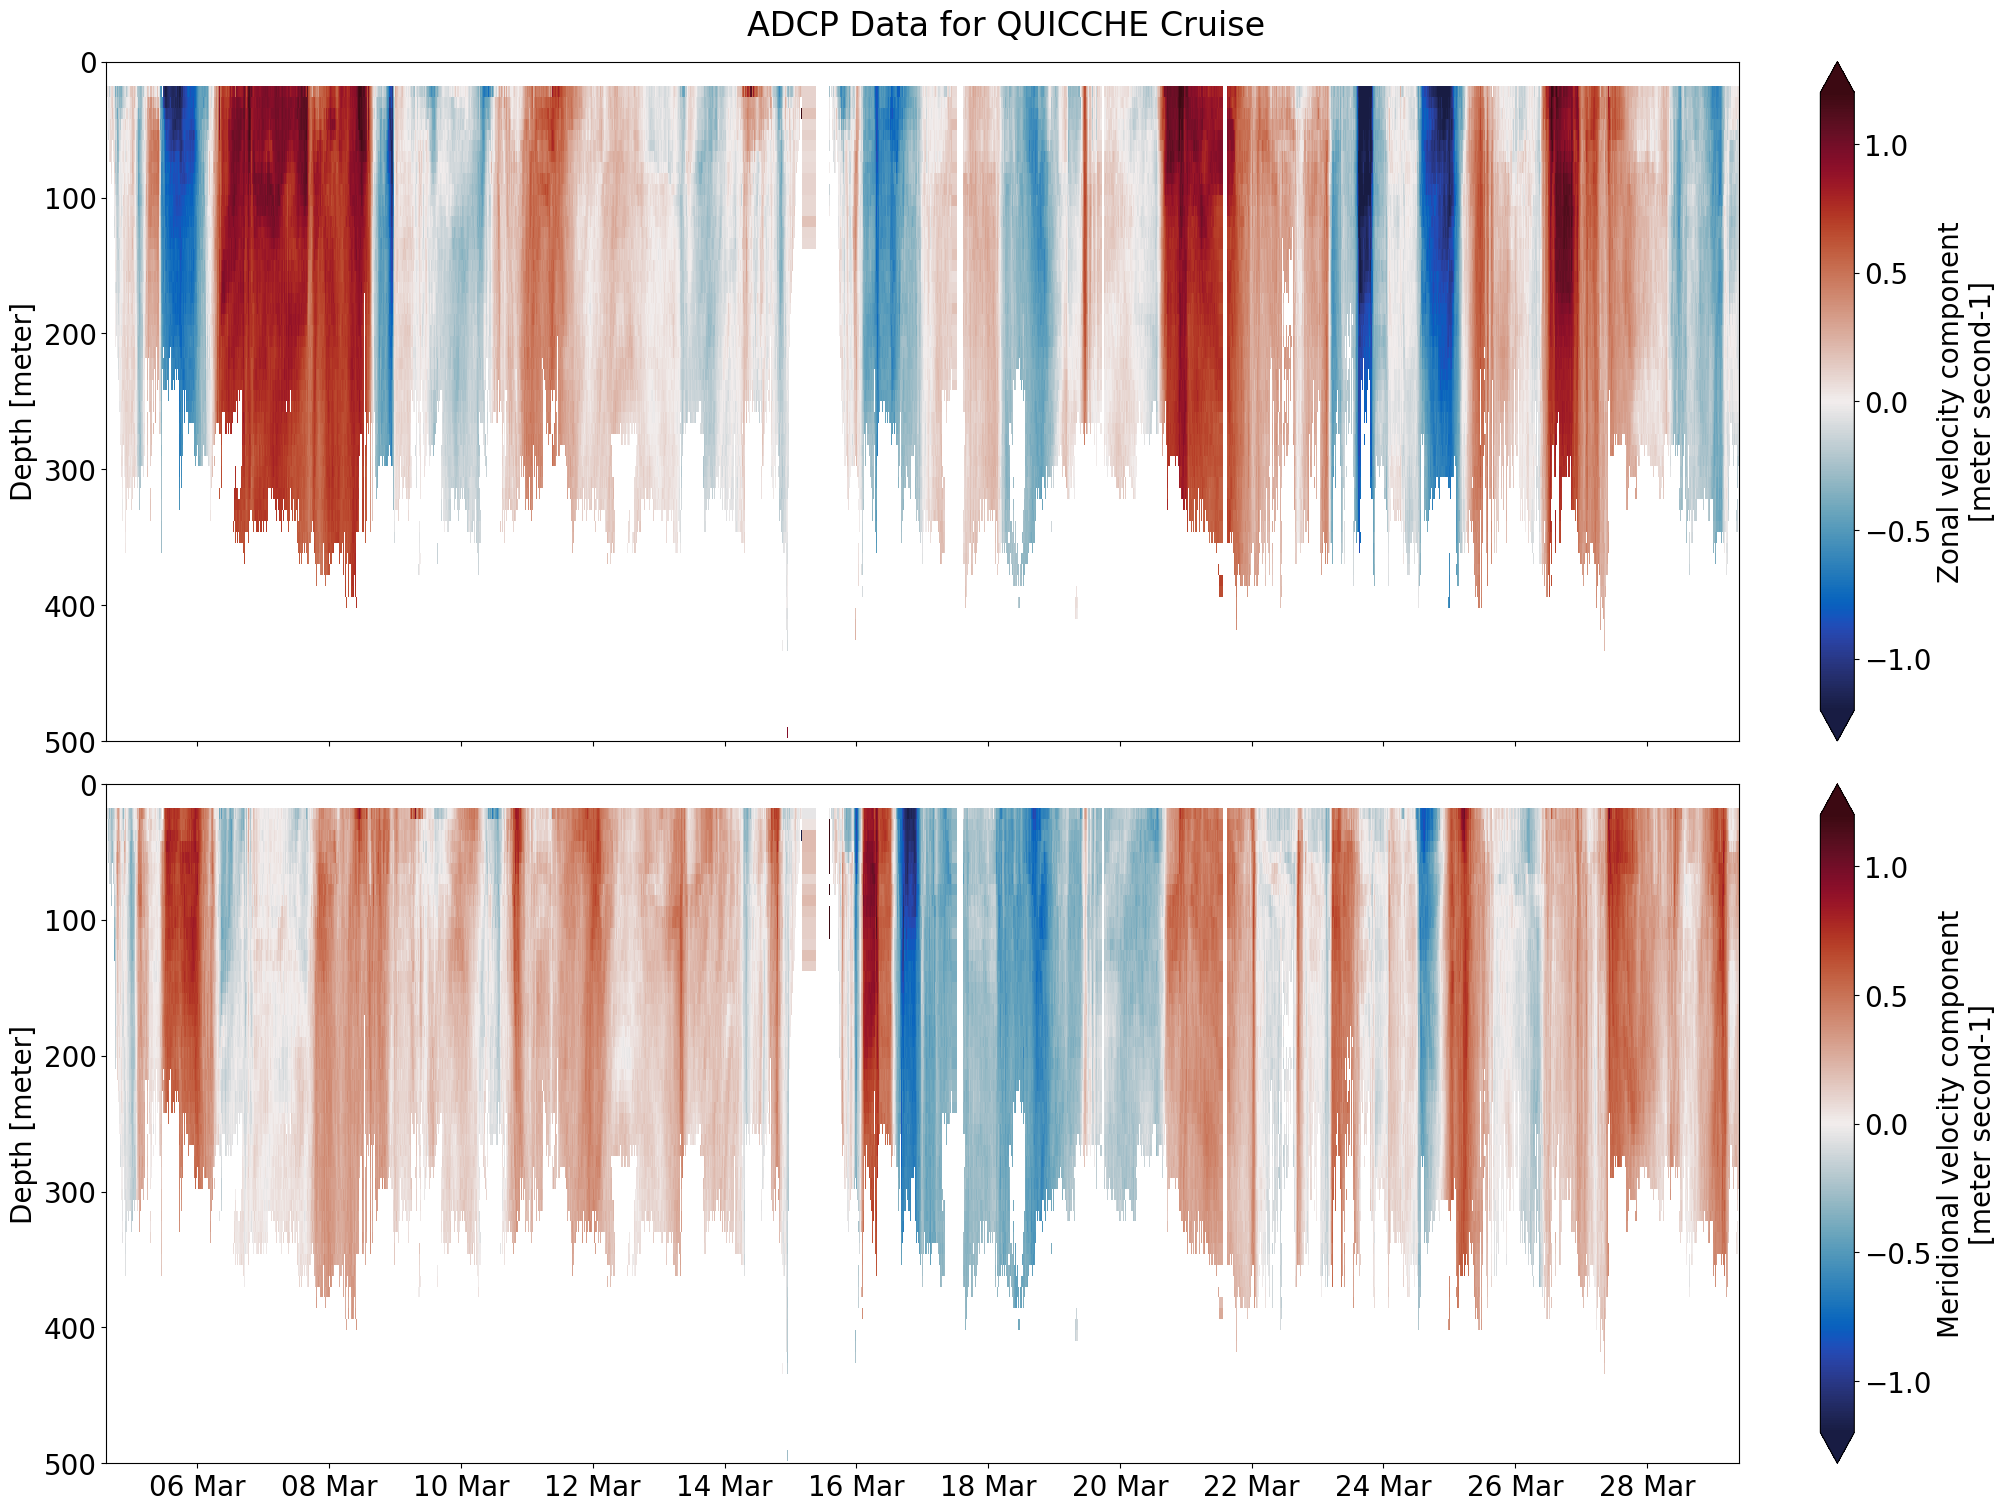

In [21]:
fig, (ax, bx) = plt.subplots(2, 1, figsize=(20,15), sharex= True, constrained_layout = True)

var = ['u', 'v']

for i, vari in enumerate(var):
    ds[vari].plot(y="depth", ylim=(500,0), vmin=-1.2, vmax=1.2, cmap="cmo.balance", ax=[ax, bx][i])
    

bx.xaxis.set_major_locator(mdates.DayLocator(np.arange(0,30,2)))
bx.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
rot_ticks(bx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)

fig.suptitle("ADCP Data for QUICCHE Cruise")

Text(0.5, 0.98, 'Cruise Track with ADCP Data')

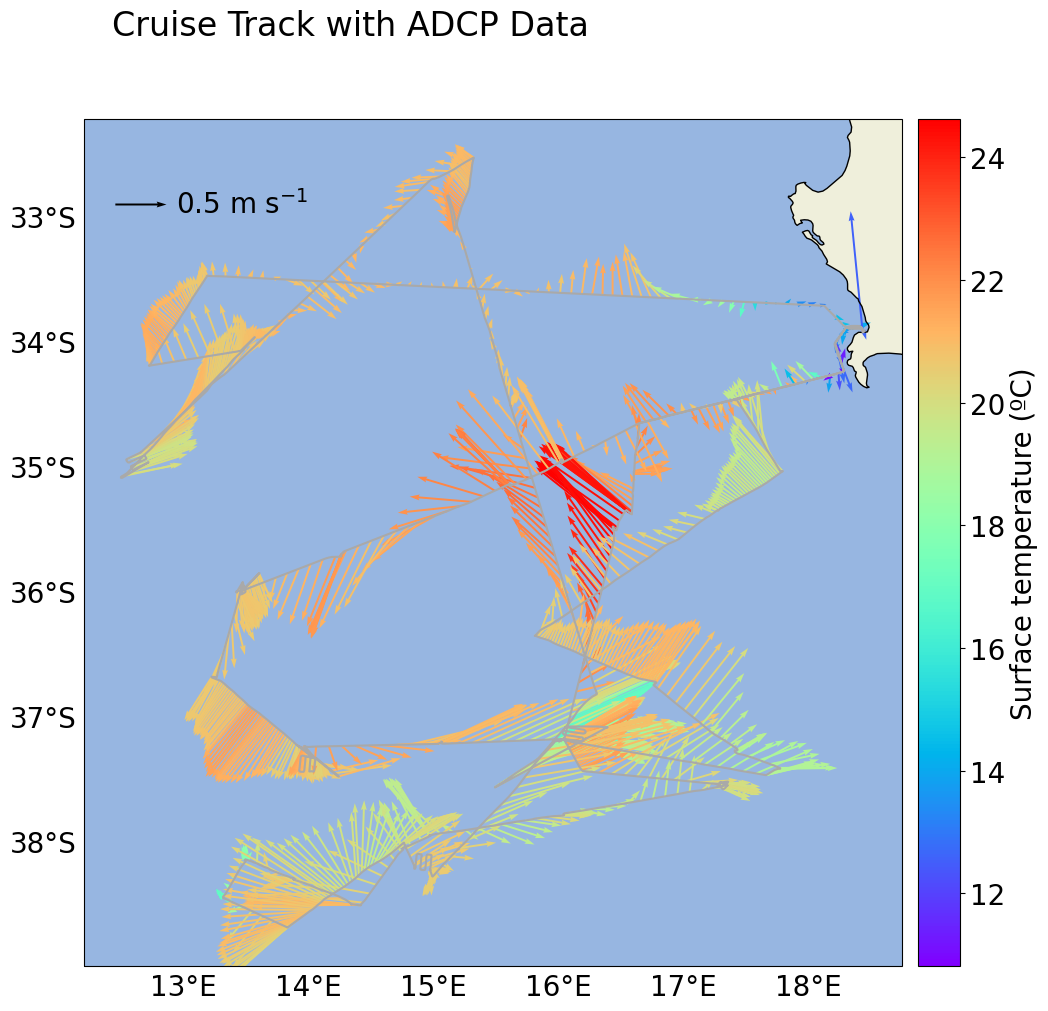

In [50]:
# Quiver plot
fig, ax = plt.subplots(figsize=(20,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(ds.lon, ds.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
quivplt = ds.isel(time=np.arange(0,len(ds.time),8),
                  depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                                y='lat',
                                                                u='u',
                                                                v='v',
                                                                scale=8,
                                                                pivot='tail',
                                                                hue="tr_temp",
                                                                cmap="rainbow",
                                                                cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)'})

qk = ax.quiverkey(quivplt, 0.1, 0.9, 0.5, '0.5 m s$^{-1}$', 
                  labelpos='E',
                  coordinates='axes', zorder=6, color='k')
fig.suptitle("Cruise Track with ADCP Data")
#ax.set_extent([16,16.5,-37.25,-36.9])

<xarray.Dataset>
Dimensions:     (depth: 60)
Coordinates:
  * depth       (depth) float32 21.96 29.96 37.96 45.96 ... 478.0 486.0 494.0
Data variables: (12/13)
    trajectory  float64 0.0
    lon         float64 0.0
    lat         float64 0.0
    u           (depth) float64 0.001735 0.002863 0.002863 ... 1.0 1.0 0.9999
    v           (depth) float64 0.001735 0.002863 0.002863 ... 1.0 1.0 0.9999
    amp         (depth) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...          ...
    pflag       (depth) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    heading     float64 0.0
    tr_temp     float64 0.0
    num_pings   float64 0.0
    uship       float64 0.0004338
    vship       float64 0.0004338